In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

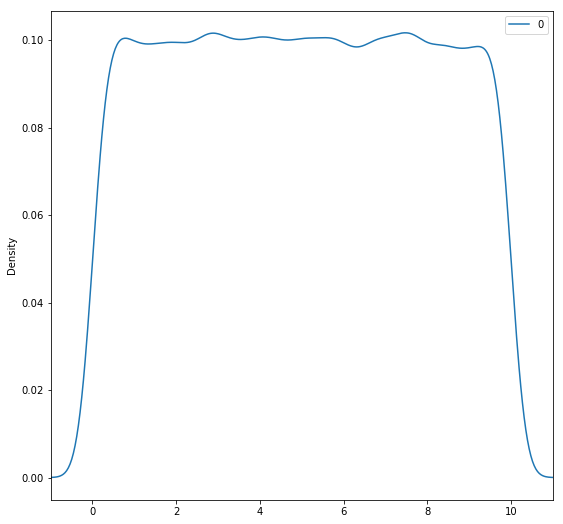

In [11]:
uniform_data= stats.uniform.rvs(size=100000,
                               loc=0,
                               scale=10)
pd.DataFrame(uniform_data).plot(kind='density',
                               figsize=(9,9),
                               xlim=(-1,11))

In [16]:
import random
random.randint(0,10) #random interger from the specified range

2

In [17]:
random.choice([2,4,6,9]) #random element from a sequence

2

In [18]:
random.random() #real number between 0 and 1

0.4726866390754011

In [19]:
random.uniform(0,10) #get a real in the specified range

8.487722382186053

In [21]:
#cumulative probability until 2.5 starting from 0
stats.uniform.cdf(x=2.5, #cutoff value 
                 loc=0, #start point
                 scale=10) # end point

0.25

In [24]:
# gets you the value given the probability, inverse od cdf
stats.uniform.ppf(q=0.25, #probability cutoff
                 loc=0, #Distribution start
                 scale=10) #Distribution end

2.5

In [25]:
for x in range(-1,12,3):
    print('Density at x value' + str(x))
    print(stats.uniform.pdf(x,loc=0,scale=10))

Density at x value-1
0.0
Density at x value2
0.1
Density at x value5
0.1
Density at x value8
0.1
Density at x value11
0.0


## Normal Distibution

In [29]:
prob_under_minus1=stats.norm.cdf(x=-1,loc=0,scale=1)
prob_over_1=1-stats.norm.cdf(x=1,loc=0,scale=1)
between_prob=1-(prob_under_minus1+prob_over_1)
print(prob_under_minus1,prob_over_1,between_prob)

0.158655253931 0.158655253931 0.682689492137


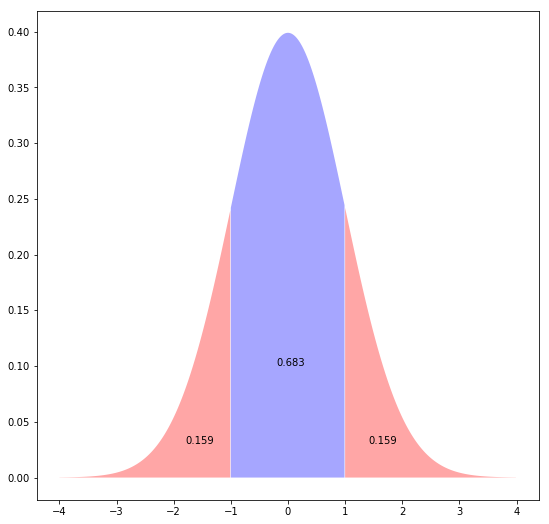

In [37]:
plt.rcParams['figure.figsize']=(9,9)
plt.fill_between(x=np.arange(-4,-1,0.01),
                y1= stats.norm.pdf(np.arange(-4,-1,0.01)),
                facecolor='red',
                 alpha=0.35)
plt.fill_between(x=np.arange(1,4,0.01),
                y1= stats.norm.pdf(np.arange(1,4,0.01)),
                facecolor='red',
                 alpha=0.35)
plt.fill_between(x=np.arange(-1,1,0.01),
                y1= stats.norm.pdf(np.arange(-1,1,0.01)),
                facecolor='blue',
                 alpha=0.35)
plt.text(x=-1.8,y=0.03, s=round(prob_under_minus1,3))
plt.text(x=-0.2,y=0.1,s=round(between_prob,3))
plt.text(x=1.4, y=0.03, s=round(prob_over_1,3))

In [38]:
print(stats.norm.ppf(q=0.025)) # Find the quantile for the 2.5% cutoff

-1.95996398454


In [39]:
print(stats.norm.ppf(q=0.975)) # Find the quantile for 97.5% cutoff

1.95996398454


## The Binomial Distribution

In [40]:
fair_coin_flips=stats.binom.rvs(n=10, # number of flips per trial
                               p=0.5, #succes probability
                               size=10000) # number of trials
print(pd.crosstab(index='counts',columns=fair_coin_flips))

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts   4  90  464  1193  2064  2517  1981  1132  458  84  13


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113d5f518>]], dtype=object)

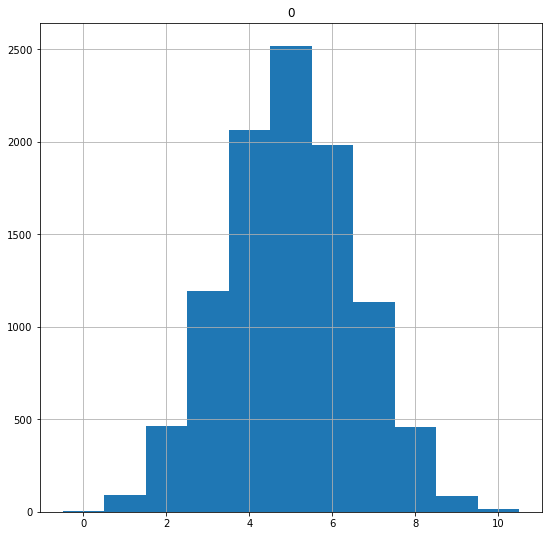

In [41]:
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)

In [42]:
biased_coin_flips=stats.binom.rvs(n=10, # number of flips per trial
                               p=0.8, #succes probability
                               size=10000) # number of trials
print(pd.crosstab(index='counts',columns=biased_coin_flips))

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   2   5  55  275  847  2008  3074  2718  1016


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113177a20>]], dtype=object)

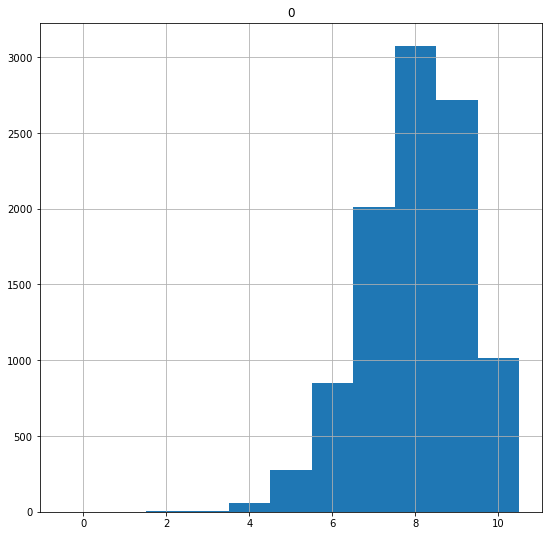

In [43]:
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5),bins=11)

In [44]:
stats.binom.cdf(k=5, #Probability of k=5 succeses or less
                n=10, # with 10 flips
                p=0.8 # and succes probability 0.8
               )

0.032793497599999964

In [45]:
1 - stats.binom.cdf(k=5, #Probability of k=9 succes or more
                n=10, # with 10 flips
                p=0.8 # and succes probability 0.8
               )

0.96720650240000006

In [46]:
stats.binom.pmf(k=5, # Probability of k=5 succeses
               n=10, #with 10 flips
               p=0.5) # and succes probability 0.5

0.24609375000000025

In [47]:
stats.binom.pmf(k=8, # Probability of k=8 succeses
               n=10, #with 10 flips
               p=0.8) # and succes probability 0.5

0.30198988799999998

## The Poisson Distribution

In [50]:
random.seed(12) # The seed number you choose is the starting point used in generation of a sequence of random numbers
arrival_rate_1=stats.poisson.rvs(size=10000, # generate poison data
                            mu=1) #Avereged arrival time 1
print(pd.crosstab(index='counts',columns=arrival_rate_1))

col_0      0     1     2    3    4   5  6  8
row_0                                       
counts  3711  3586  1863  621  173  39  6  1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1142afbe0>]], dtype=object)

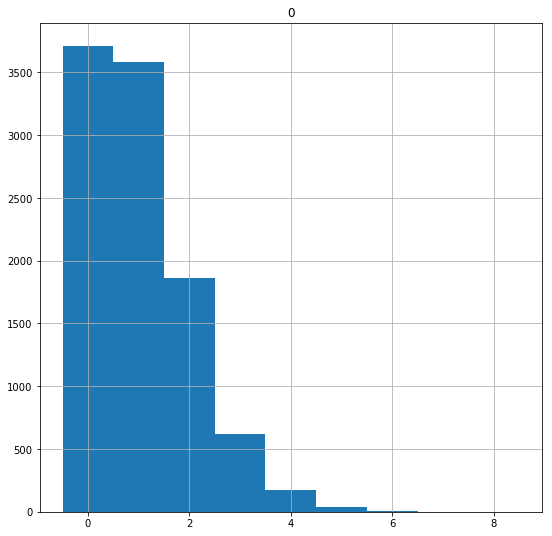

In [52]:
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5),
                                 bins=max(arrival_rate_1)+1)

In [54]:
random.seed(12) # The seed number you choose is the starting point used in generation of a sequence of random numbers
arrival_rate_10=stats.poisson.rvs(size=10000, # generate poison data
                            mu=10) #Avereged arrival time 1
print(pd.crosstab(index='counts',columns=arrival_rate_10))

col_0   0   1   2   3    4    5    6    7     8     9  ...   15   16   17  18  \
row_0                                                  ...                      
counts   1   7  15  70  202  359  592  940  1061  1230 ...  349  211  139  76   

col_0   19  20  21  22  23  24  
row_0                           
counts  34  22   8   6   3   2  

[1 rows x 25 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114eccf28>]], dtype=object)

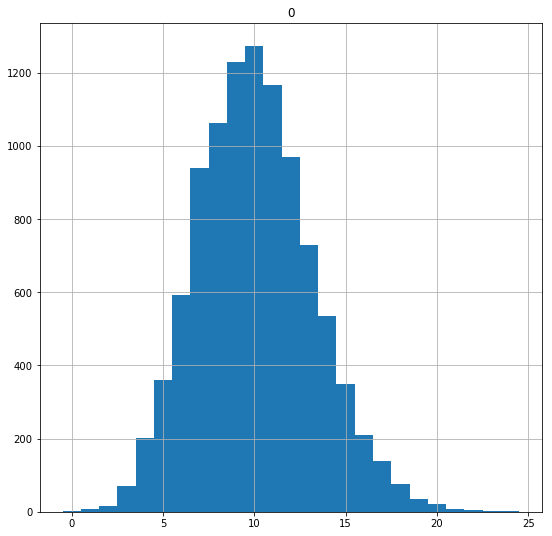

In [56]:
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5),
                                 bins=max(arrival_rate_10)+1)

In [57]:
stats.poisson.cdf(k=5, # Check the probability of 5 arrivals or less
                 mu=10) # With arrival rate 10

0.067085962879031888

In [58]:
stats.poisson.pmf(k=10, # Check the probability of 10 arrivals exactly
                 mu=10) # With arrival rate 10

0.12511003572113372